In [53]:
import matplotlib.pyplot as plt
import csv
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pydotplus

In [57]:
cols=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"]
df=pd.read_csv('adult.data.csv',header=None,names=cols)

In [58]:
df

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#查看資料型態
df.info()

In [37]:
df2=df
df2

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [38]:
#資料預處理函式
def Preprocess(data):
    #將缺失值刪掉
    try:
        data = data.replace(' ?', np.NaN)
        data.dropna(inplace=True)
    except:
        pass
    #將文字轉數字
    labelencoder = LabelEncoder()
    for i in range(len(data.columns)):
        if data[data.columns[i]].dtypes==object:
            data[data.columns[i]] = labelencoder.fit_transform(data[data.columns[i]]).astype(np.int64)
    return data

In [39]:
df2=Preprocess(df2)
df2

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [40]:
#分配訓練資料、測試資料
x_train = df2.sample(frac=0.8,random_state=25)
x_test= df2[~df2.index.isin(x_train.index)]

In [41]:
#設定答案
y_train = x_train.pop('money')
y_test = x_test.pop('money')

In [42]:
x_train

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
25098,56,1,435836,12,14,0,9,1,4,0,0,0,40,38
19379,45,2,194772,15,10,2,13,0,4,1,0,0,55,38
4629,45,2,168837,15,10,2,0,5,4,0,0,0,24,1
2103,43,3,172826,15,10,2,11,0,4,1,99999,0,55,38
16818,55,5,153451,11,9,2,12,5,4,0,0,1887,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30835,45,2,294671,8,11,2,2,0,4,1,4386,0,38,38
25735,30,2,113364,11,9,4,6,2,4,1,0,0,40,39
29163,51,0,100653,11,9,0,0,1,4,0,0,0,8,38
4271,42,2,385591,11,9,2,3,0,4,1,0,0,50,38


In [43]:
x_test

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38
15,34,2,245487,5,4,2,13,0,0,1,0,0,45,25
34,22,5,311512,15,10,2,7,0,2,1,0,0,15,38
37,19,2,544091,11,9,1,0,5,4,0,0,0,25,38
67,53,2,169846,11,9,2,0,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32524,26,2,191648,7,12,4,6,2,4,0,0,0,15,38
32532,34,2,204461,10,16,2,9,0,4,1,0,0,60,38
32535,22,2,325033,2,8,4,10,3,2,1,0,0,35,38
32543,45,1,119199,7,12,0,9,4,4,0,0,0,48,38


In [44]:
y_train

25098    0
19379    0
4629     1
2103     1
16818    1
        ..
30835    1
25735    0
29163    0
4271     1
7432     1
Name: money, Length: 24130, dtype: int64

In [45]:
y_test

7        1
15       0
34       0
37       0
67       1
        ..
32524    0
32532    1
32535    0
32543    0
32554    1
Name: money, Length: 6032, dtype: int64

In [46]:
#決策樹模型
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split =5)
clf = clf.fit(x_train,y_train)

In [47]:
clf.score(x_train,y_train)

0.8465395772896809

In [48]:
clf.score(x_test,y_test)

0.8315649867374005

[Text(188.32500000000002, 199.32, 'X[7] <= 0.5\nentropy = 0.808\nsamples = 24130\nvalue = [18140, 5990]'),
 Text(95.11363636363637, 163.07999999999998, 'X[4] <= 12.5\nentropy = 0.994\nsamples = 9946\nvalue = [5410, 4536]'),
 Text(49.45909090909091, 126.83999999999999, 'X[10] <= 5095.5\nentropy = 0.917\nsamples = 6939\nvalue = [4633, 2306]'),
 Text(30.436363636363637, 90.6, 'X[4] <= 8.5\nentropy = 0.877\nsamples = 6579\nvalue = [4627, 1952]'),
 Text(15.218181818181819, 54.359999999999985, 'X[0] <= 36.5\nentropy = 0.477\nsamples = 1052\nvalue = [944, 108]'),
 Text(7.609090909090909, 18.119999999999976, 'entropy = 0.264\nsamples = 313\nvalue = [299, 14]'),
 Text(22.827272727272728, 18.119999999999976, 'entropy = 0.55\nsamples = 739\nvalue = [645, 94]'),
 Text(45.654545454545456, 54.359999999999985, 'X[0] <= 35.5\nentropy = 0.919\nsamples = 5527\nvalue = [3683, 1844]'),
 Text(38.04545454545455, 18.119999999999976, 'entropy = 0.741\nsamples = 1821\nvalue = [1439, 382]'),
 Text(53.2636363636

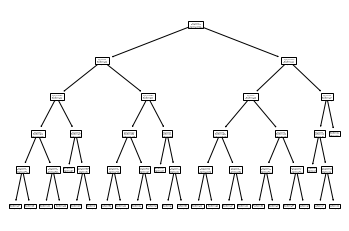

In [49]:
tree.plot_tree(clf)

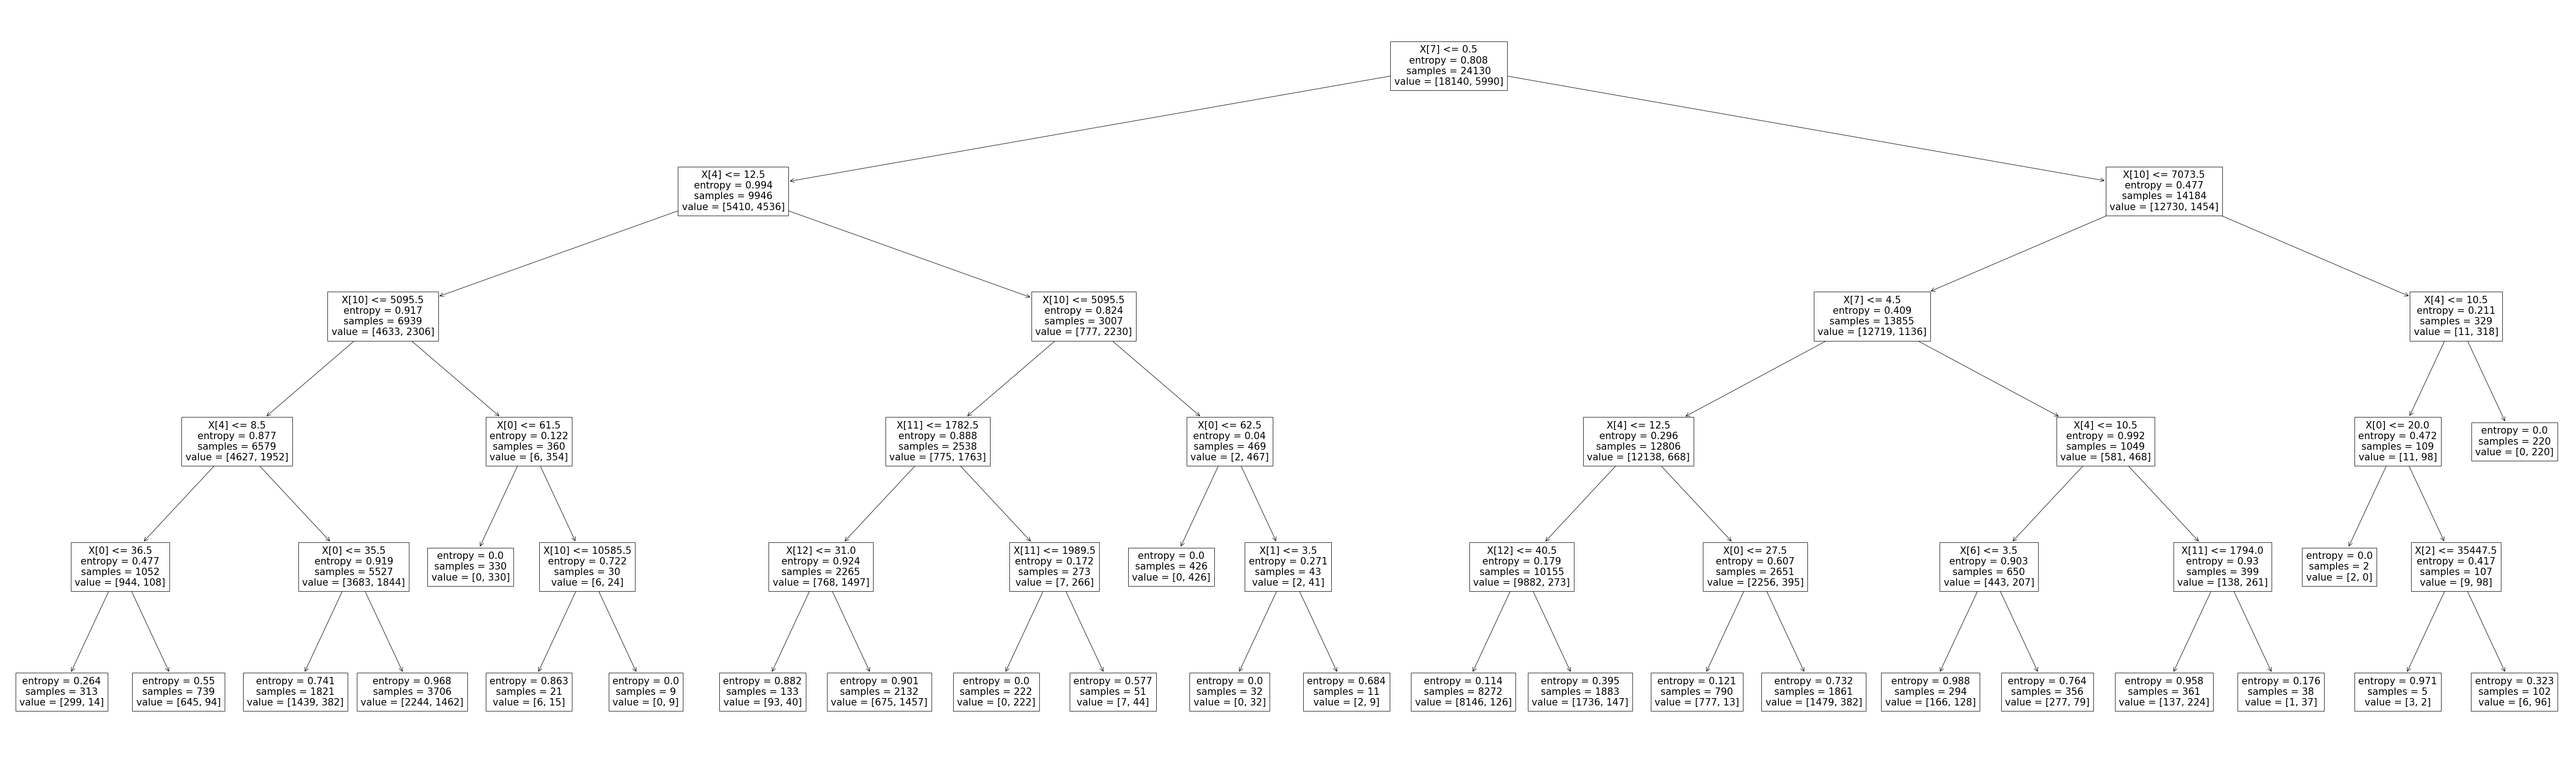

In [52]:
fig,ax=plt.subplots(figsize=(100,30)) 
tree.plot_tree(clf,ax=ax);

In [51]:
df_outer = x_test.join(y_test, how='outer')
df_outer['predict'] = clf.predict(x_test)
df_outer['result'] = (df_outer['money'] == df_outer['predict'])
df_outer.to_excel("adult_entropy_depth5.xlsx")